In [6]:
import pandas as pd
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
X = df.iloc[:,[0,1,2,3,]].values

In [18]:
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

C:\Users\gajul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


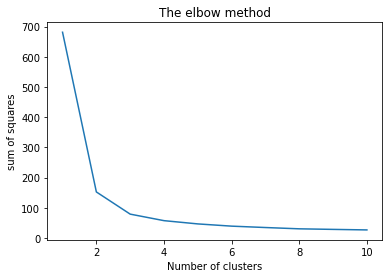

In [21]:
#to predict the optimum number of clusters we can use the elbow method or the silhoutte score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
squaresum = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(X)
    squaresum.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), squaresum)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squares') # Within cluster sum of squares
plt.show()

In [22]:
#from the above graph the optimum number of clusters is equal to 3
#so our model 
kmeans = KMeans(n_clusters = 3,random_state = 42)

In [26]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [27]:
y_out = kmeans.predict(X)

In [28]:
y_out

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

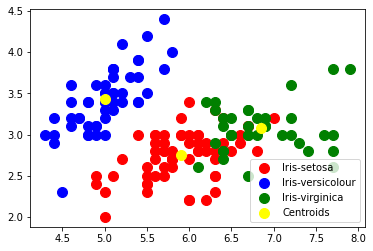

In [29]:
# Visualising the clusters - On the first two columns
#this plots the scatter plot for the first two columns and when the y_out = 0 signifying as setosa
plt.scatter(x[y_out == 0, 0], x[y_out == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
#this plots the scatter plot for the first two columns and when the y_out = 1 signifying as versicolor
plt.scatter(x[y_out == 1, 0], x[y_out == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
#this plots the scatter plot for the first two columns and when the y_out = 2 signifying as virginica
plt.scatter(x[y_out == 2, 0], x[y_out == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
#s = 100 shows the marker size
# Plotting the centroids of the clusters
#[:,0] specifies the x-co-ordinate and [:,1] specifies the y co-ordinate
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()